<a href="https://colab.research.google.com/github/09360990/test/blob/main/1214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

線上作業28: 實作深度學習分類鳶尾花花種

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical


#os.chdir('/Users/akashsrivastava/Desktop/MachineLearning/kaggle/iris-keras')

dataset = pd.read_csv('./Iris.csv')

dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


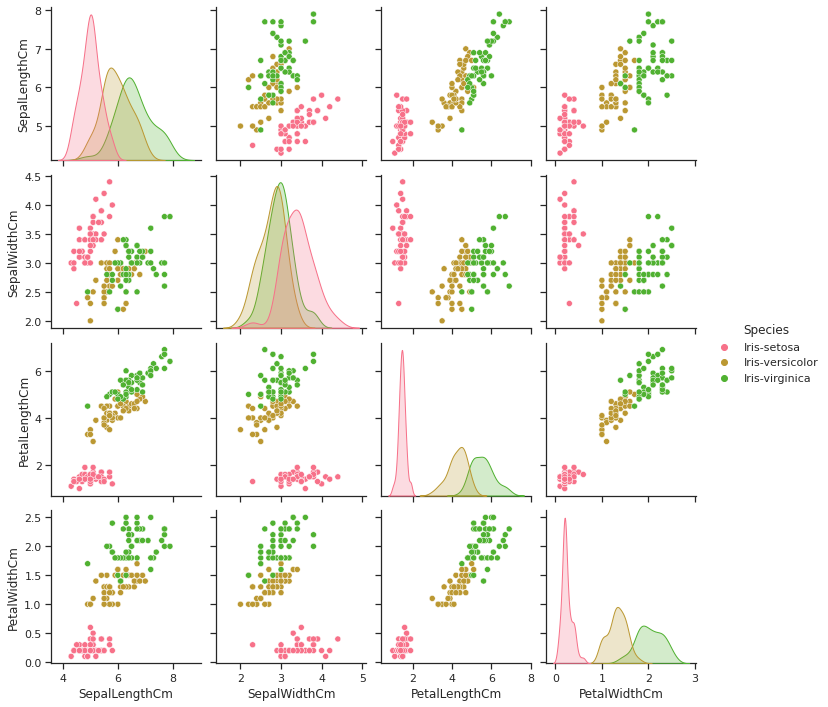

In [ ]:
#Plotting the pairwise relationship of different parameters

import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[:,1:6],hue="Species")

In [ ]:
#Splitting the data into training and test test
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [ ]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=100)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.9678 - accuracy: 0.5917
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6611 - accuracy: 0.7500
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.8000
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.8917
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2486 - accuracy: 0.9667
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1837 - accuracy: 0.9417
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1469 - accuracy: 0.9500
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9583
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.2076 - accuracy: 0.9417
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1704 - accuracy: 0.9250
Epoch 11/100
4/4 [===========

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


線上作業29: 使用Keras工具, 完成手寫阿拉伯數字辨識, 並產生訓練model檔

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential  #← 匯入 Keras 的序列式模型類別
from tensorflow.keras.layers import Dense       #← 匯入 Keras 的密集層類別

model = Sequential()   #← 建立序列模型物件
model.add(Dense(4, activation='relu', input_dim= 3))  #← 加入第 1 層
model.add(Dense(1, activation='sigmoid'))    #← 加入第 2 層
model.compile(optimizer='rmsprop',           #← 以指定的參數編譯模型
              loss='binary_crossentropy',
              metrics=['accuracy'])

11490434/11490434 [==============================] - 0s 0us/step


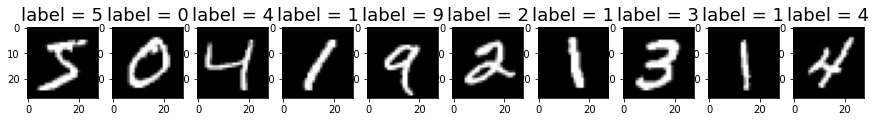

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2612 - acc: 0.9241
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1040 - acc: 0.9685
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0684 - acc: 0.9800
Epoch 4/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0496 - acc: 0.9856
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0367 - acc: 0.9891
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0286 - acc: 0.9915
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0217 - acc: 0.9933
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0168 - acc: 0.9954
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0129 - acc: 0.9963
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0668 - acc: 0.9823
對測試資料集的準確率： 0.9822999835014343
313/313 [

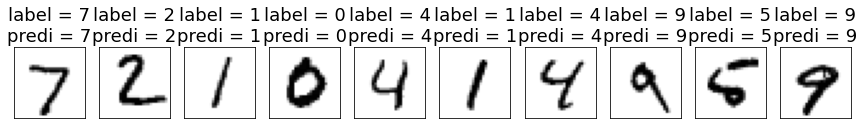

In [ ]:
# 載入 MNIST 資料集
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 畫出手寫數字圖片
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 4)  #←設定圖形的寬和高 (英吋)
for i in range(10):
    ax = plt.subplot(1, 10, 1+i)  #←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(train_images[i], cmap= 'gray')   #←顯示灰階圖片(黑底白字)
    ax.set_title('label = '+str(train_labels[i]), fontsize=18)  #←設定標題
plt.show()  #將圖形顯示出來

# 預處理訓練資料
x_train = train_images.reshape((60000, 28 * 28)) #←將 (60000,28,28) 轉換成 (60000,784)
x_train = x_train.astype('float32') / 255    #←再將 0~255 的像素值轉換成 0~1 的浮點數

x_test = test_images.reshape((10000, 28 * 28))  #}←將 10000 筆測試樣本做同樣的轉換
x_test = x_test.astype('float32') / 255         #}

# 預處理標籤資料
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)  #←將標籤做 One-hot 編碼
y_test  = to_categorical(test_labels)  #←將測試做 One-hot 編碼

#程 建立多元分類模型
from tensorflow.keras.models import Sequential  #← 匯入 Keras 的序列式模型類別
from tensorflow.keras.layers import Dense       #← 匯入 Keras 的密集層類別

model = Sequential()                 #← 建立序列模型物件
model.add(Dense(512, activation='relu', input_dim= 784)) #← 加入第一層
model.add(Dense(10, activation='softmax'))               #← 加入第二層
model.compile(optimizer='rmsprop',             #← 指定優化器
              loss='categorical_crossentropy', #← 指定損失函數
              metrics=['acc'])                 #← 指定評量準則


#程 訓練模型
history = model.fit(x_train, y_train, epochs=10, batch_size=128)

#程 評估模型成效
test_loss, test_acc = model.evaluate(x_test, y_test)   #←使用測試樣本及標籤來評估普適能力
print('對測試資料集的準確率：', test_acc)

#程 畫出測試圖片並標示預測結果與標準答案

#predict = model.predict_classes(x_test)  #←用測試樣本進行預測
predict = model.predict(x_test)
classes_x=np.argmax(predict,axis=1)

plt.gcf().set_size_inches(15, 4)  #←設定圖形的尺吋
for i in range(10):
    ax = plt.subplot(1, 10, 1+i)   #←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(test_images[i], cmap='binary')   #←顯示灰階圖片
    ax.set_title('label = '+str(test_labels[i]) +
                 '\npredi = '+str(classes_x[i]), fontsize=18) #←設定標題
    ax.set_xticks([]); ax.set_yticks([])       #←X, Y 軸不顯示刻度
plt.show()  #←將圖形顯示出來

#程 將模型存檔
model.save('MnistModel.h5')   #← 將模型以指定的檔名存檔



In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#載入 MNIST 資料集
(_, _), (test_images, test_labels) = mnist.load_data()

#資料預處理
x_test = test_images.reshape((10000, 28 * 28)) #←將 10000 筆測試樣本做同樣的轉換
x_test = x_test.astype('float32') / 255       #←將 10000 筆測試標籤做同樣的轉換
y_test  = to_categorical(test_labels)

from tensorflow.keras.models import load_model  #←匯入 load_model 函式

model = load_model('MnistModel.h5')  #← 由檔案載入模型

test_loss, test_acc = model.evaluate(x_test, y_test) #←用測試資料評估成效
print('對測試資料的準確率：', test_acc)




313/313 [==============================] - 2s 6ms/step - loss: 0.0668 - acc: 0.9823
對測試資料的準確率： 0.9822999835014343
